In [9]:
%pylab inline
import pandas as pd
import seaborn as sns
import datetime
from collections import OrderedDict
sns.set_context('talk', font_scale=1.5)
sns.set_style('white')

Populating the interactive namespace from numpy and matplotlib


In [10]:
xl = pd.ExcelFile('../BISC-104-Session01-Scientific-Method-Friday-M.xlsx')

sheet_names = xl.sheet_names  # see all sheet names
sheet_names

['TEMPLATE_DO_NOT_EDIT',
 'KendallAllen__RTCC',
 'AlyshaHaeems__Trousdale',
 'ArjunSaran_SavannahEjmin',
 'EjminSavannah__TommyTrojan',
 'AndrePipersburgh__TommyTrojan',
 'IchinosukeOkada',
 'AdrianGomez__Trousdale',
 'ClaireRedlaczyk__TommyTrojan',
 'DanJackovics__McCarthyQuad',
 'SanaTahir__Trousdale',
 'MadisonLorenz__TommyTrojan']

In [18]:
all_df = OrderedDict()
master_df = pd.DataFrame()
index = 1
for sheet_name in sheet_names[1:]:
    df = pd.read_excel('../BISC-104-Session01-Scientific-Method-Friday-M.xlsx', sheet_name=sheet_name)
    df.columns = ['Day', 'Time',  '# Females', '# Males']
    all_df['sheet-{}'.format(index)] = df
    master_df = pd.concat([master_df, df], ignore_index=True)
    index+=1

In [8]:
print(master_df.to_latex(index=False))

\begin{tabular}{llrr}
\toprule
Day &         Time &  \# Females &  \# Males \\
\midrule
  T &  11:00-11:05 &          8 &       22 \\
  T &  13:40-13:45 &          6 &       27 \\
  W &  09:20-09:25 &          3 &       13 \\
  T &  16:05-16:10 &          9 &       19 \\
  W &  11:30-11:35 &          6 &       20 \\
  W &  15:15-15:20 &          8 &       13 \\
  T &  16:00-16:15 &          6 &       39 \\
  W &  14:55-15:10 &          4 &       31 \\
 Th &  14:55-15:10 &          2 &       28 \\
  W &  14:55-15:10 &          4 &       31 \\
 Th &  12:00-12:15 &          6 &       36 \\
 Th &  14:45-15:00 &         12 &       18 \\
  F &  16:30-16:40 &          6 &       15 \\
  T &  11:50-12:00 &         10 &       21 \\
  T &  14:00-14:10 &          8 &        8 \\
  W &  20:50-21:00 &          0 &        1 \\
  W &  10:10-10:15 &          7 &        9 \\
 Th &  15:25-15:30 &          6 &       14 \\
 Th &  11:10-11:15 &          3 &       17 \\
 Th &  13:45-13:50 &          5 &     

In [23]:
all_df = OrderedDict()
master_df = pd.DataFrame()
index = 1
for sheet_name in sheet_names[1:]:
    df = pd.read_excel('../BISC-104-Session01-Scientific-Method-Friday-M.xlsx', sheet_name=sheet_name)
    df.columns = ['Day', 'Time',  '# Females', '# Males']
    #df['Group'] = sheet_name
    df['Group'] = 'sheet-{}'.format(index)
    #all_df[sheet_name] = df
    all_df['sheet-{}'.format(index)] = df
    index += 1
    master_df = pd.concat([master_df, df], ignore_index=True)

In [24]:
master_df.columns

Index(['Day', 'Time', '# Females', '# Males', 'Group'], dtype='object')

In [25]:
master_df_molten = pd.melt(master_df, id_vars=['Day', 'Time', 'Group'], value_vars=['# Females', '# Males'])

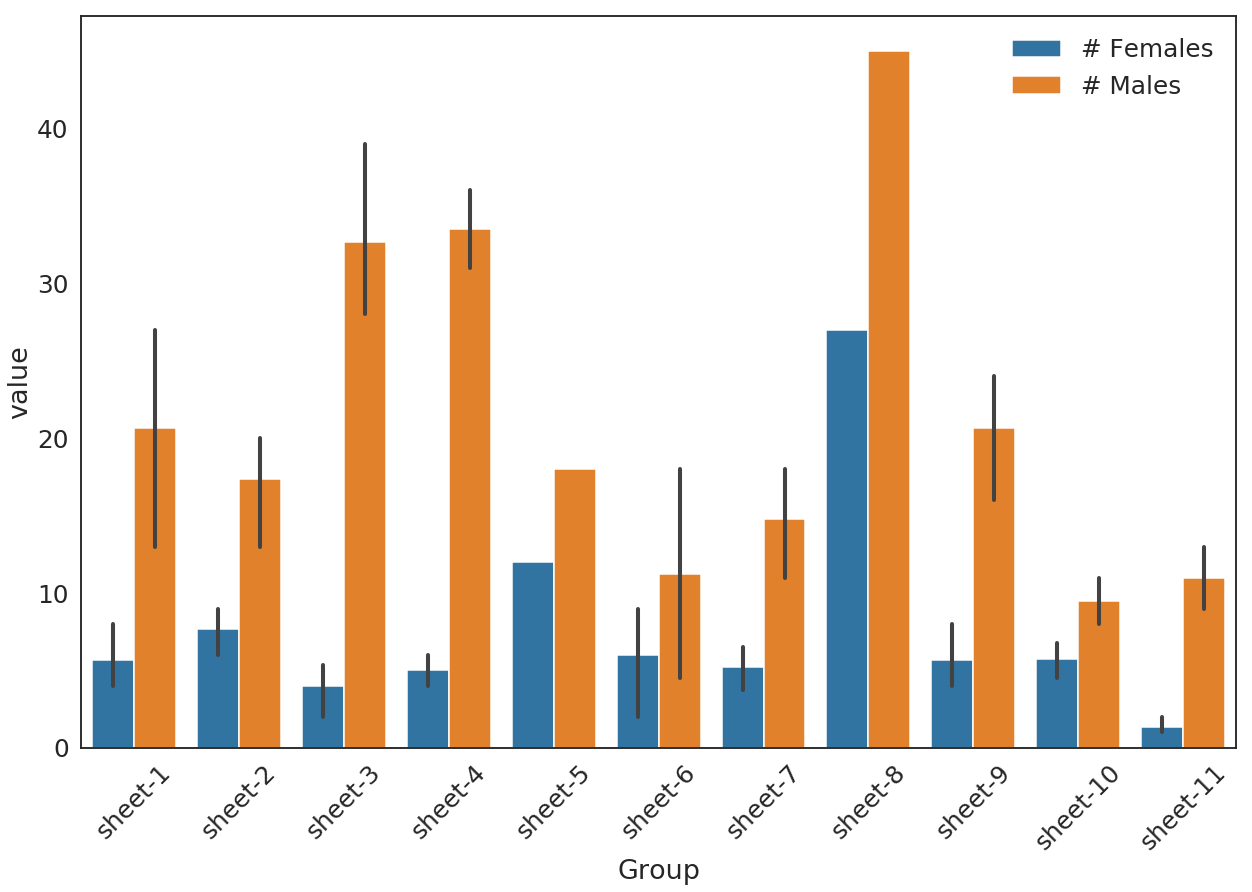

In [26]:
fig, ax = plt.subplots(figsize=(18, 13))
sns.barplot(data=master_df_molten, x='Group', y='value', hue='variable')
plt.xticks(rotation=45)
ax.legend(frameon=False)
fig.tight_layout()

fig.savefig('BISC104_Fr_M_bar.pdf')

In [27]:
all_df = OrderedDict()
master_df = pd.DataFrame()
index = 1

for sheet_name in sheet_names[1:]:
    df = pd.read_excel('../BISC-104-Session01-Scientific-Method-Friday-M.xlsx', sheet_name=sheet_name)
    df.columns = ['Day', 'Time',  '# Females', '# Males']
    #df['Group'] = sheet_name
    df['Group'] = 'sheet-{}'.format(index)
    index += 1
    df[['Time_start', 'Time_end']] = df['Time'].str.split('-', n=1, expand=True)
    df['Time_start'] = pd.to_datetime(df['Time_start'])#.astype(pd.Timestamp)
    df['Time_end'] = pd.to_datetime(df['Time_end'])#.astype(pd.Timestamp)
    df['delta'] = [datetime.timedelta.total_seconds(x) for x in df['Time_end'] - df['Time_start']]
    all_df[sheet_name] = df
    df['# Females'] = df['# Females']/df['delta'].astype(float)
    df['# Males'] = df['# Males']/df['delta']
    master_df = pd.concat([master_df, df], ignore_index=True)
    

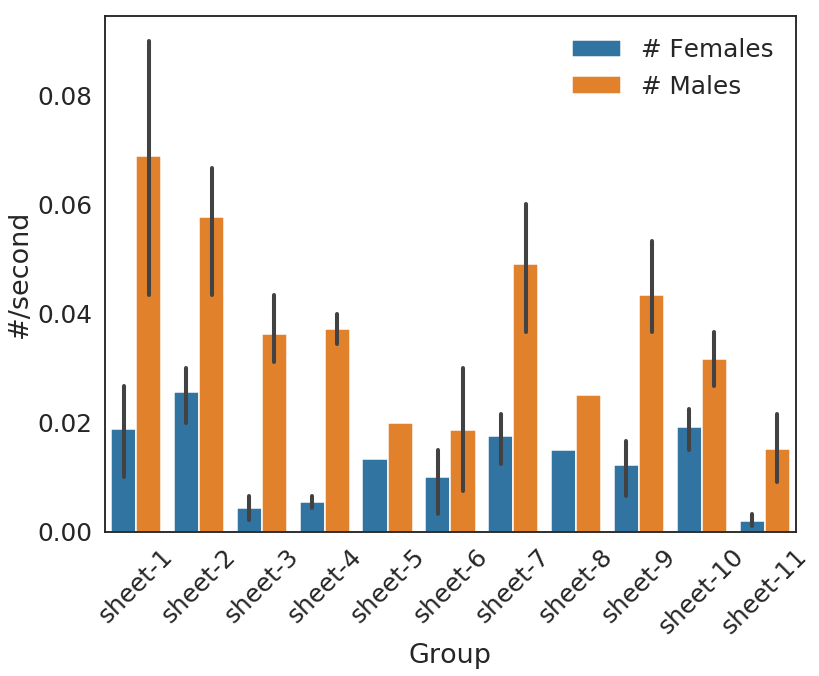

In [28]:
master_df_molten = pd.melt(master_df, id_vars=['Day', 'Time', 'Group'], value_vars=['# Females', '# Males'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=master_df_molten, x='Group', y='value', hue='variable')
plt.xticks(rotation=45)
ax.set_ylabel('#/second')
fig.tight_layout()
ax.legend(frameon=False)
fig.savefig('BISC104_F_M_bar_normalized.pdf')

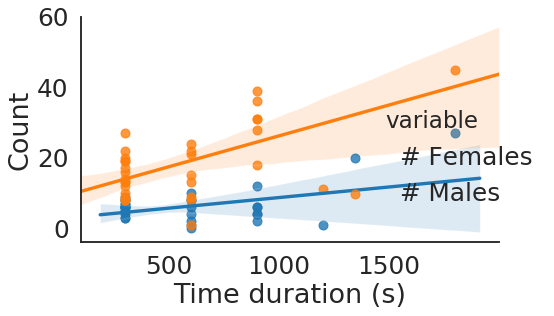

In [29]:
all_df = OrderedDict()
master_df = pd.DataFrame()
index = 1
for sheet_name in sheet_names[1:]:
    df = pd.read_excel('../BISC-104-Session01-Scientific-Method-Friday-M.xlsx', sheet_name=sheet_name)
    df.columns = ['Day', 'Time',  '# Females', '# Males']
    df['Group'] = sheet_name
    df['Group'] = 'sheet-{}'.format(index)
    index += 1
    df[['Time_start', 'Time_end']] = df['Time'].str.split('-', n=1, expand=True)
    df['Time_start'] = pd.to_datetime(df['Time_start'])#.astype(pd.Timestamp)
    df['Time_end'] = pd.to_datetime(df['Time_end'])#.astype(pd.Timestamp)
    df['delta'] = [datetime.timedelta.total_seconds(x) for x in df['Time_end'] - df['Time_start']]
    all_df[sheet_name] = df
    #df['# Females'] = df['# Females']/df['delta'].astype(float)
    #df['# Males'] = df['# Males']/df['delta']
    master_df = pd.concat([master_df, df], ignore_index=True)
master_df_molten = pd.melt(master_df, id_vars=['Day', 'Time', 'Group', 'delta'], value_vars=['# Females', '# Males'])

sns.lmplot(x="delta", y="value", hue="variable", data=master_df_molten, legend_out=True)

plt.xlabel('Time duration (s)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('BISC104_F_M_bar_timewise.pdf')

In [30]:
all_df = OrderedDict()
master_df = pd.DataFrame()
index = 1
for sheet_name in sheet_names[1:]:
    df = pd.read_excel('../BISC-104-Session01-Scientific-Method-Friday-M.xlsx', sheet_name=sheet_name)
    df.columns = ['Day', 'Time',  '# Females', '# Males']
    #df['Group'] = sheet_name
    split_sheet = sheet_name.split('__')
    if len(split_sheet)==2:
        location = split_sheet[1]
    else:
        location = 'not-specified'
    df['Group'] = location
    #all_df[sheet_name] = df
    all_df['sheet-{}'.format(index)] = df
    index += 1
    master_df = pd.concat([master_df, df], ignore_index=True)

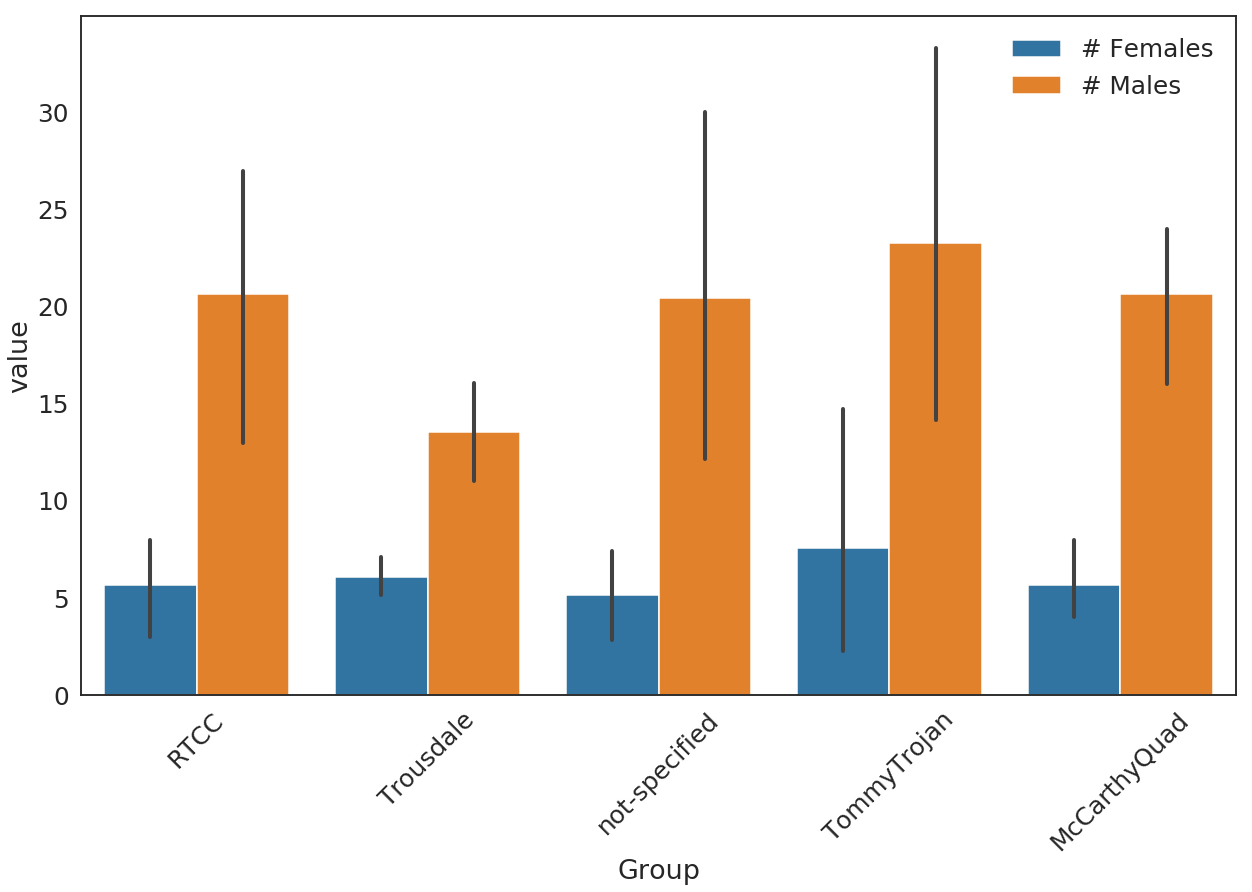

In [32]:
master_df_molten = pd.melt(master_df, id_vars=['Day', 'Time', 'Group'], value_vars=['# Females', '# Males'])

fig, ax = plt.subplots(figsize=(18, 13))
sns.barplot(data=master_df_molten, x='Group', y='value', hue='variable')
plt.xticks(rotation=45)
ax.legend(frameon=False)
fig.tight_layout()

fig.savefig('BISC104_Fr_M_bar_location.pdf')

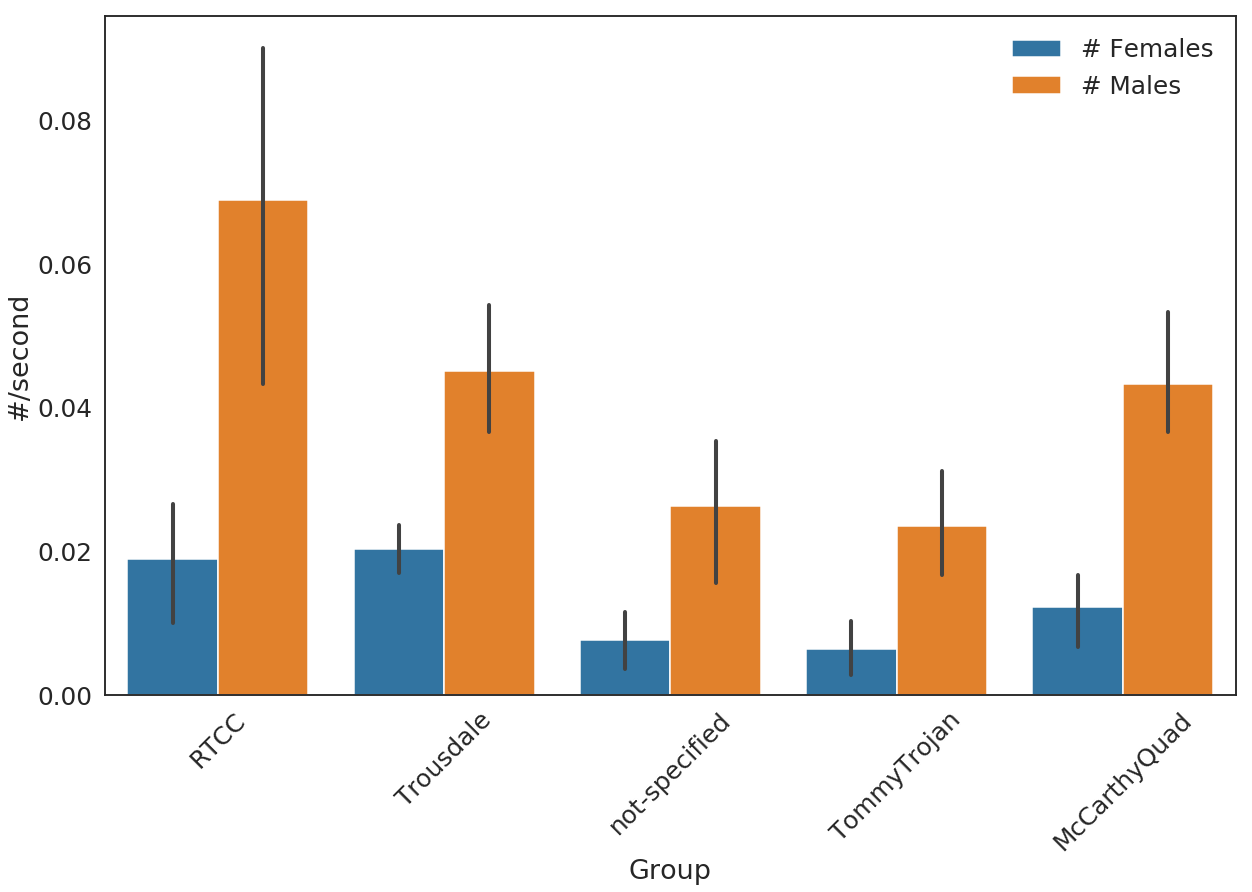

In [34]:
all_df = OrderedDict()
master_df = pd.DataFrame()
index = 1
for sheet_name in sheet_names[1:]:
    df = pd.read_excel('../BISC-104-Session01-Scientific-Method-Friday-M.xlsx', sheet_name=sheet_name)
    df.columns = ['Day', 'Time',  '# Females', '# Males']
    #df['Group'] = sheet_name
    split_sheet = sheet_name.split('__')
    if len(split_sheet)==2:
        location = split_sheet[1]
    else:
        location = 'not-specified'
    df['Group'] = location
    #all_df[sheet_name] = df
    all_df['sheet-{}'.format(index)] = df
    index += 1
    
    df[['Time_start', 'Time_end']] = df['Time'].str.split('-', n=1, expand=True)
    df['Time_start'] = pd.to_datetime(df['Time_start'])#.astype(pd.Timestamp)
    df['Time_end'] = pd.to_datetime(df['Time_end'])#.astype(pd.Timestamp)
    df['delta'] = [datetime.timedelta.total_seconds(x) for x in df['Time_end'] - df['Time_start']]
    all_df[sheet_name] = df
    df['# Females'] = df['# Females']/df['delta'].astype(float)
    df['# Males'] = df['# Males']/df['delta']
    master_df = pd.concat([master_df, df], ignore_index=True)

master_df_molten = pd.melt(master_df, id_vars=['Day', 'Time', 'Group'], value_vars=['# Females', '# Males'])

fig, ax = plt.subplots(figsize=(18, 13))
sns.barplot(data=master_df_molten, x='Group', y='value', hue='variable')
plt.xticks(rotation=45)
ax.legend(frameon=False)
ax.set_ylabel('#/second')

fig.tight_layout()

fig.savefig('BISC104_Fr_M_bar_location_normalized.pdf')